In [1]:
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
df= pd.read_csv("FraudTrain.csv")

array([[<Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >]], dtype=object)

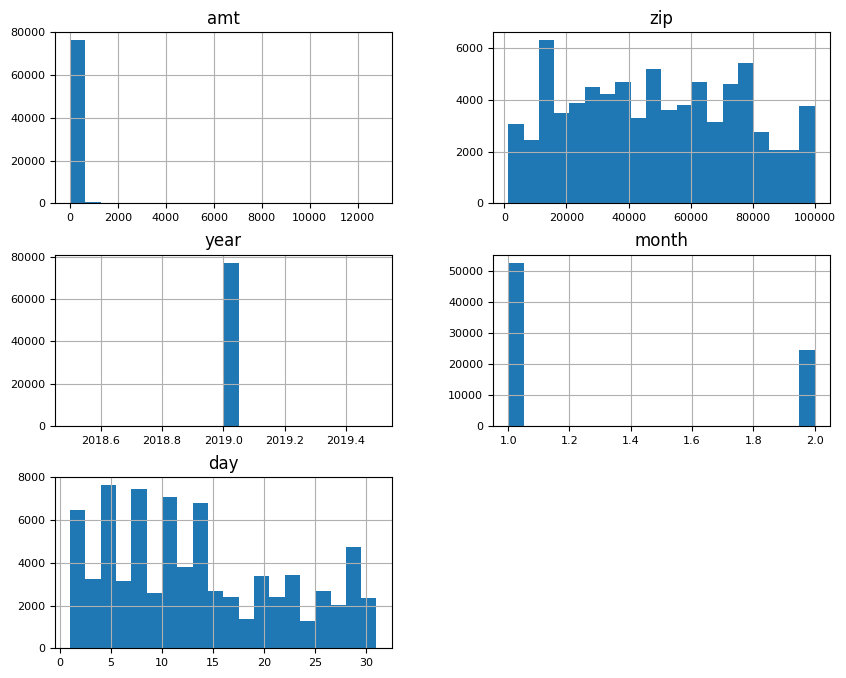

In [3]:

numerical_columns = ['amt', 'zip', 'year', 'month', 'day']
df[numerical_columns].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)

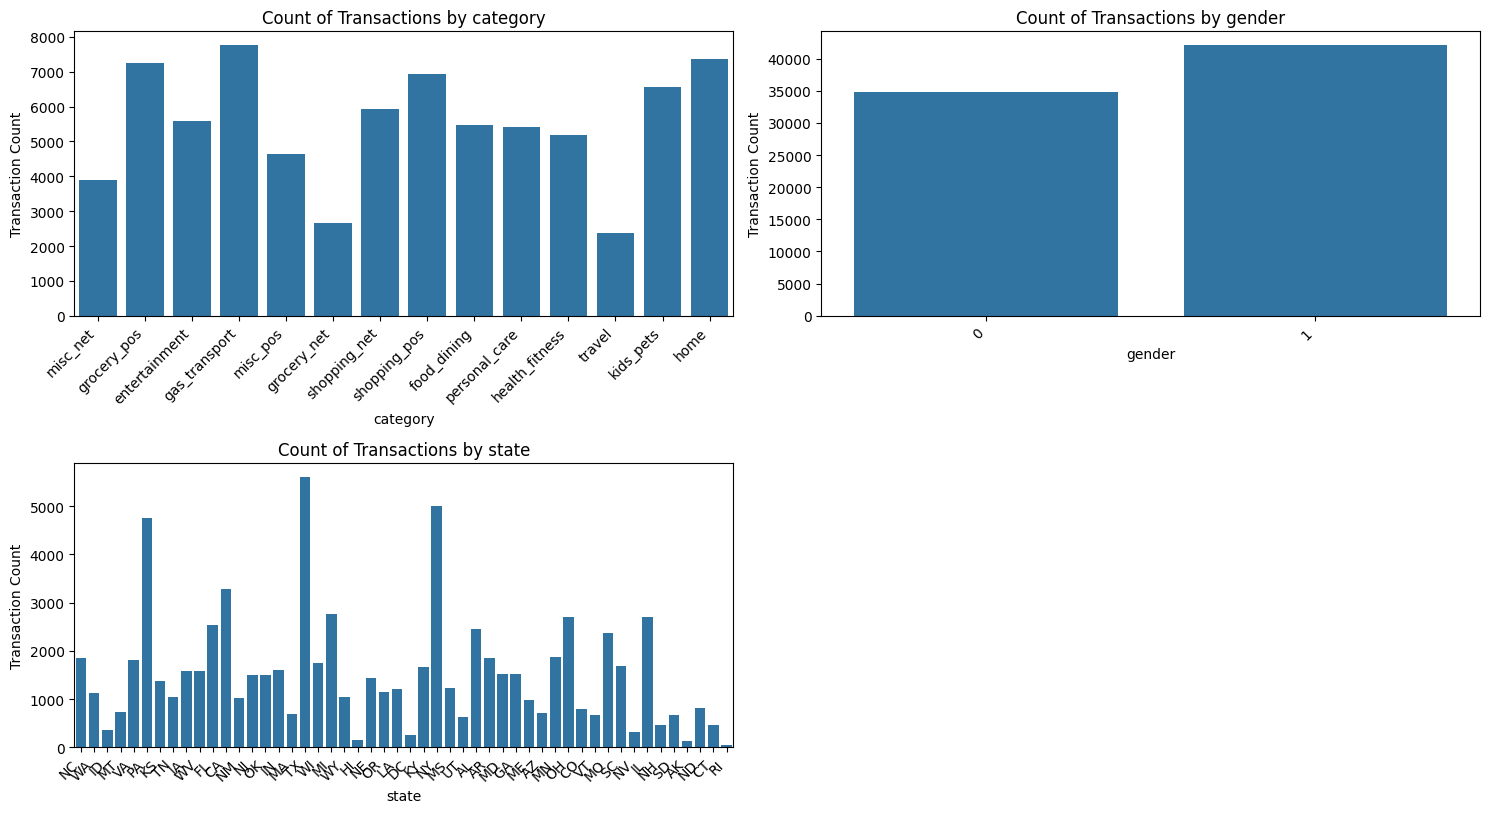

In [9]:
# Define categorical columns
categorical_columns = ['category', 'gender', 'state']

# Create individual count plots for each categorical column
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of Transactions by {col}')
    plt.xlabel(col)
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


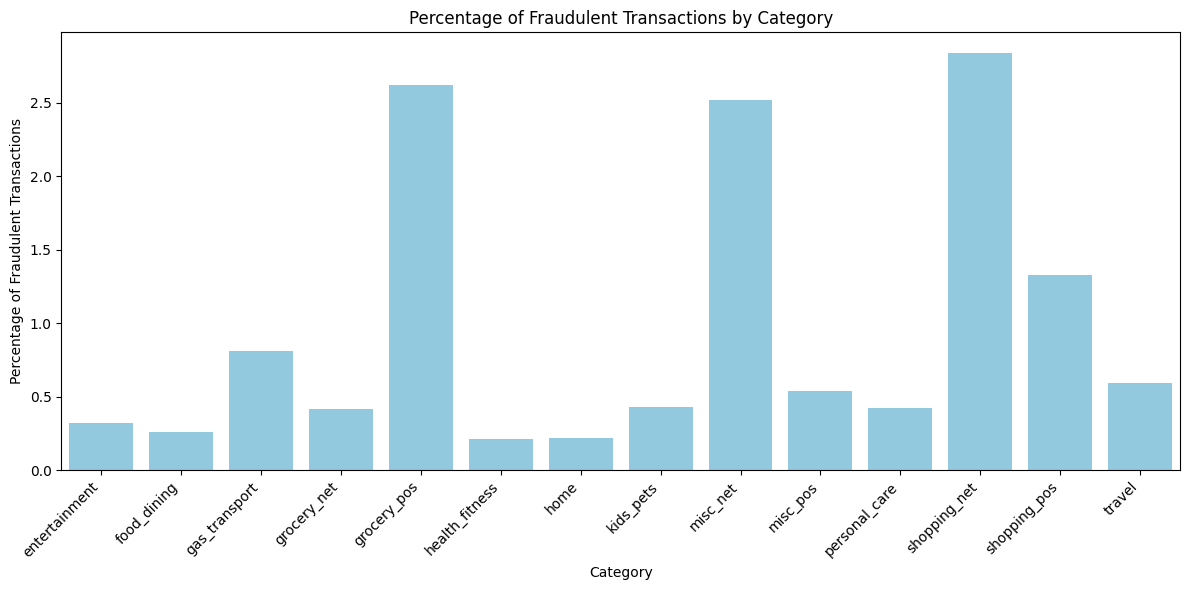

In [5]:

# Choose the categorical column and target variable
categorical_column = 'category'

# Create a DataFrame with counts of fraudulent and non-fraudulent transactions for each category
fraud_counts = df.groupby([categorical_column, 'is_fraud']).size().unstack().fillna(0)
fraud_counts['total'] = fraud_counts.sum(axis=1)

# Calculate the percentage of fraudulent transactions for each category
fraud_counts['fraud_percentage'] = (fraud_counts[1] / fraud_counts['total']) * 100

# Plot stacked bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts['fraud_percentage'], color='skyblue')
plt.title(f'Percentage of Fraudulent Transactions by {categorical_column.capitalize()}')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


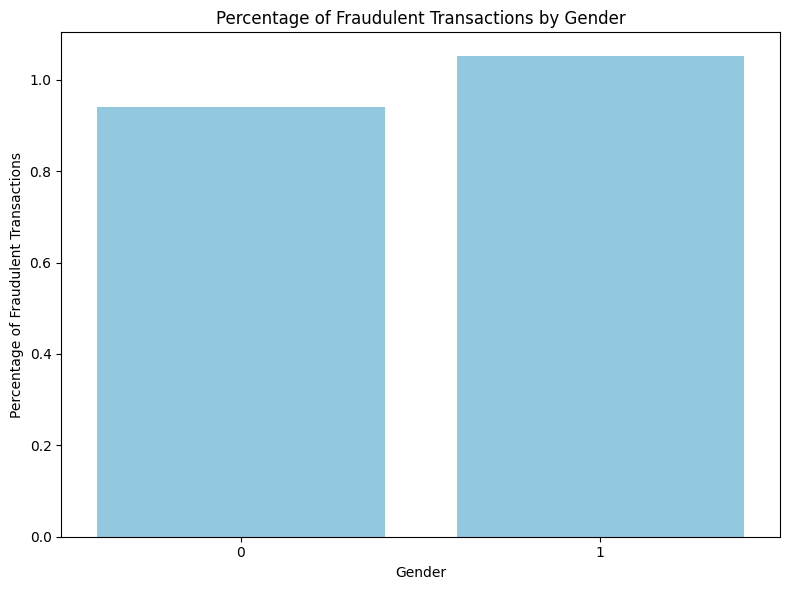

In [6]:
# Choose another categorical column
categorical_column = 'gender'

# Create a DataFrame with counts of fraudulent and non-fraudulent transactions for each gender category
fraud_counts_gender = df.groupby([categorical_column, 'is_fraud']).size().unstack().fillna(0)
fraud_counts_gender['total'] = fraud_counts_gender.sum(axis=1)

# Calculate the percentage of fraudulent transactions for each gender category
fraud_counts_gender['fraud_percentage'] = (fraud_counts_gender[1] / fraud_counts_gender['total']) * 100

# Plot stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts_gender.index, y=fraud_counts_gender['fraud_percentage'], color='skyblue')
plt.title('Percentage of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


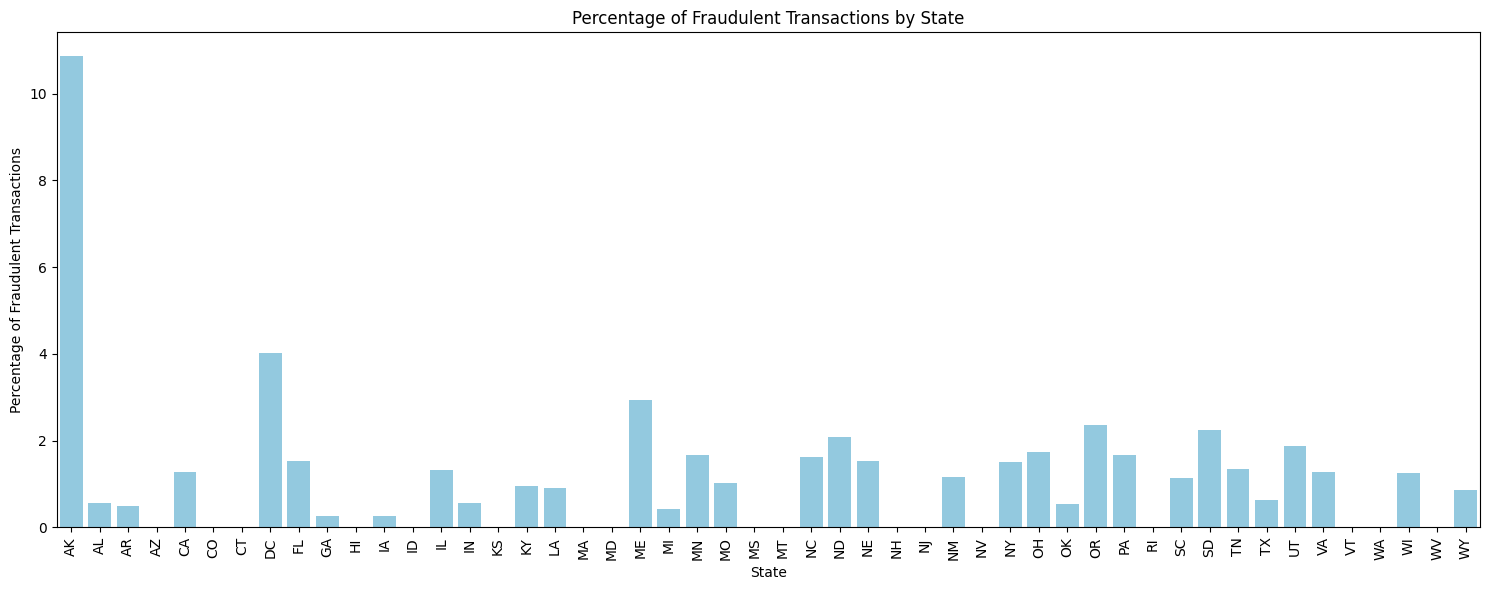

In [7]:
# Choose another categorical column
categorical_column = 'state'

# Create a DataFrame with counts of fraudulent and non-fraudulent transactions for each state
fraud_counts_state = df.groupby([categorical_column, 'is_fraud']).size().unstack().fillna(0)
fraud_counts_state['total'] = fraud_counts_state.sum(axis=1)

# Calculate the percentage of fraudulent transactions for each state
fraud_counts_state['fraud_percentage'] = (fraud_counts_state[1] / fraud_counts_state['total']) * 100

# Plot stacked bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=fraud_counts_state.index, y=fraud_counts_state['fraud_percentage'], color='skyblue')
plt.title('Percentage of Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [8]:
report = ProfileReport(df, title='My Data')
report.to_file("my_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]